# Task L13

**Description**: Apply various clustering algorithms

    Agglomerative clustering using complete linkage
    Agglomerative clustering using single linkage
    DBSCAN
    Use elbow method to determine the best k for Kmeans


## Import the required libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Creating data

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=0.6, random_state=0)

# Visualization of raw data

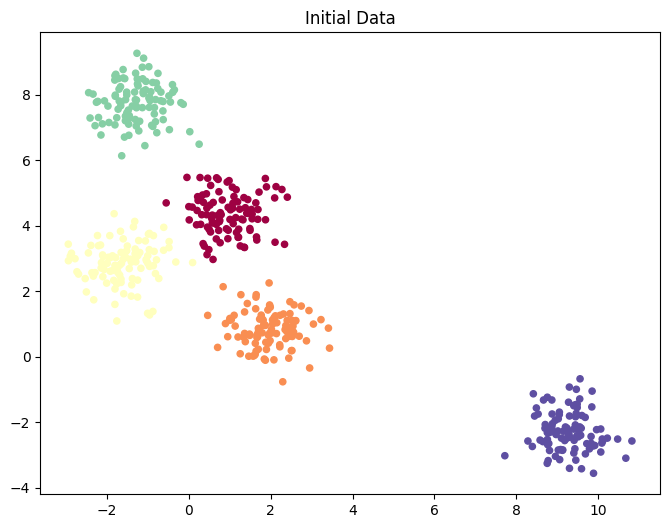

In [3]:
plt.figure(figsize=(8,6))
colors = np.array([plt.cm.Spectral(val) for val in np.linspace(0, 1, len(set(y)))])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=20)
plt.title("Initial Data")
plt.show()

# 1. Agglomerative Clustering (Complete Linkage)

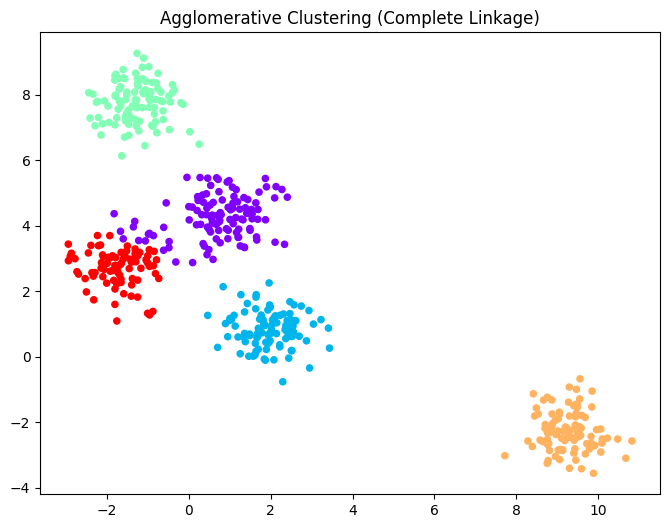

In [4]:
complete_model = AgglomerativeClustering(n_clusters=5, linkage='complete')
labels_complete = complete_model.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels_complete, cmap='rainbow', s=20)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

# 2. Agglomerative Clustering (Single Linkage)

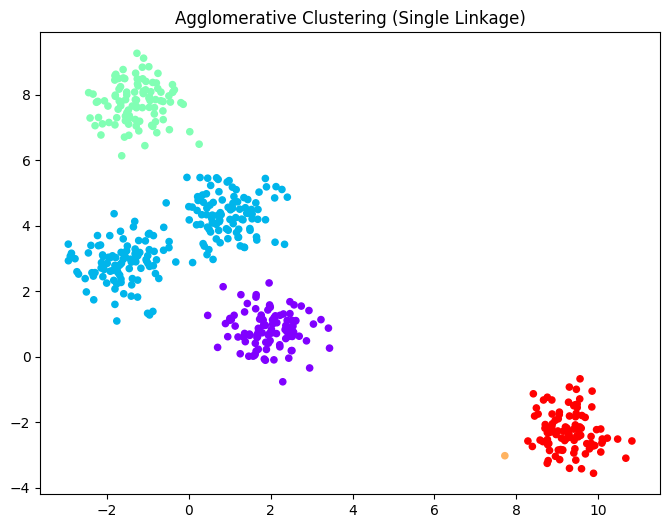

In [5]:
single_model = AgglomerativeClustering(n_clusters=5, linkage='single')
labels_single = single_model.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels_single, cmap='rainbow', s=20)
plt.title("Agglomerative Clustering (Single Linkage)")
plt.show()

# 3. DBSCAN

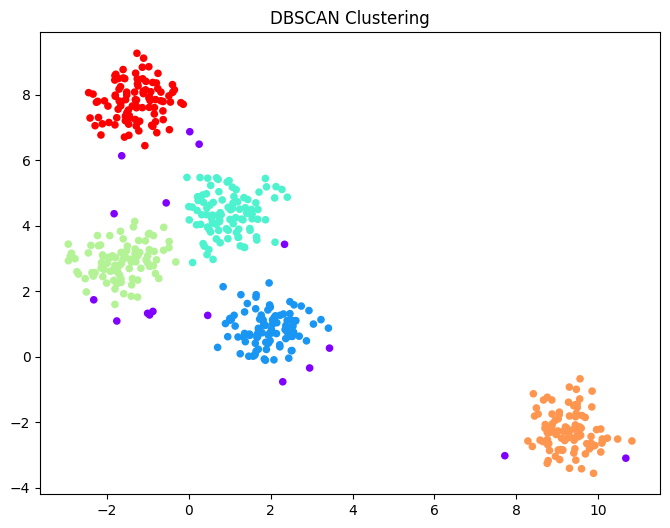

In [11]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='rainbow', s=20)
plt.title("DBSCAN Clustering")
plt.show()

# 4. KMeans + Elbow Method

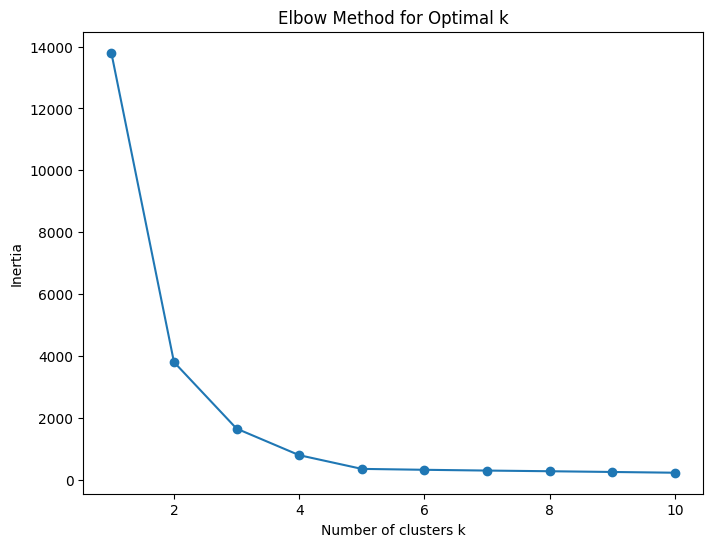

In [12]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, inertias, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# (Optional) Best KMeans

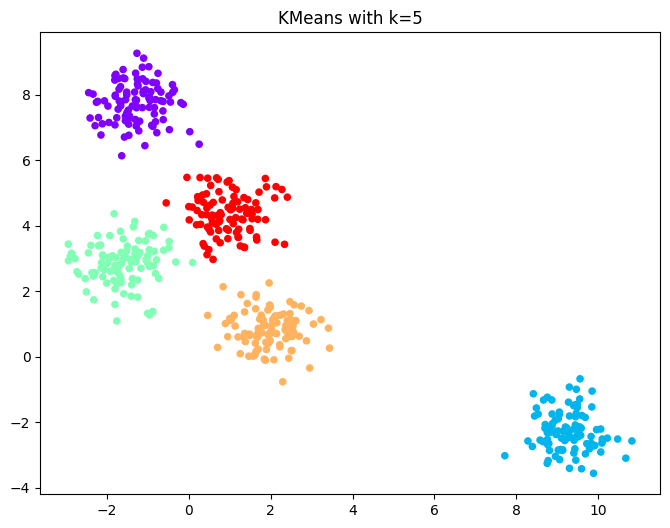

In [14]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow', s=20)
plt.title(f"KMeans with k={optimal_k}")
plt.show()

# Silhouette Score

In [29]:
def print_silhouette_scores():
    print("Silhouette Scores:")

    score_complete = silhouette_score(X, labels_complete)
    print(f"Agglomerative (Complete linkage): {score_complete:.3f}")

    score_single = silhouette_score(X, labels_single)
    print(f"Agglomerative (Single linkage):   {score_single:.3f}")

    labels_dbscan_valid = labels_dbscan[labels_dbscan != -1]
    X_valid = X[labels_dbscan != -1]
    if len(set(labels_dbscan_valid)) > 1:
        score_dbscan = silhouette_score(X_valid, labels_dbscan_valid)
        print(f"DBSCAN:                           {score_dbscan:.3f}")
    else:
        print("DBSCAN: NOT")

    score_kmeans = silhouette_score(X, labels_kmeans)
    print(f"KMeans (k=5):                     {score_kmeans:.3f}")

print_silhouette_scores()

Silhouette Scores:
Agglomerative (Complete linkage): 0.691
Agglomerative (Single linkage):   0.561
DBSCAN:                           0.732
KMeans (k=5):                     0.717


# Dendrogram

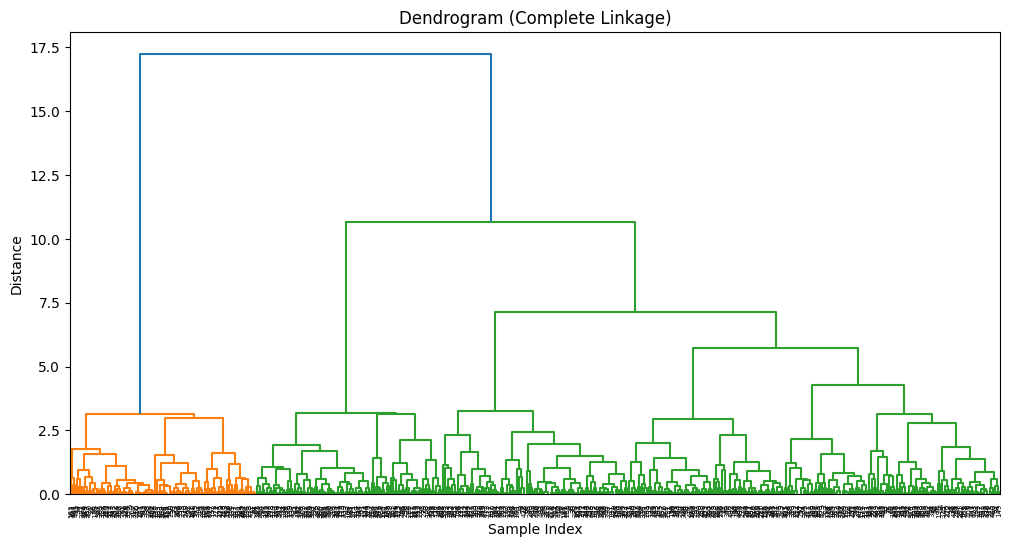

In [18]:
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(X, method='complete')
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()